# Processos Estocásticos - Trabalho de Simulação

**Alunos:** Matheus Popst e Vitória Guardieiro

In [1]:
import numpy as np
from matplotlib import pyplot as pl

## Exercício 1

In [2]:
from exercicio1 import exercicio1

In [74]:
P = np.matrix([[1/3, 0, 2/3, 0, 0],
              [1/4, 1/2, 1/4, 0, 0],
              [1/2, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 2/3, 1/3]])
P

matrix([[0.33333333, 0.        , 0.66666667, 0.        , 0.        ],
        [0.25      , 0.5       , 0.25      , 0.        , 0.        ],
        [0.5       , 0.        , 0.5       , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.66666667, 0.33333333]])

Todos os estados são recorrentes positivos, exceto o estado $2$, que é transiente.

Para encontrarmos as distribuições estacionárias solucionamos $\pi P = \pi$:

$\frac{\pi_1}{3}+\frac{\pi_2}{4}+\frac{\pi_3}{2} = \pi_1$

$\frac{\pi_2}{2} = \pi_2$

$\frac{2\pi_1}{3}+\frac{\pi_2}{4}+\frac{\pi_3}{2} = \pi_3$

$\frac{2\pi_5}{3} = \pi_4$

$\pi_4+\frac{\pi_5}{3} = \pi_5$

$\pi_1+\pi_2+\pi_3+\pi_4+\pi_5 = 1$

E assim temos que: $\pi_2 = 0$, $\pi_1 = \frac{3\pi_3}{4}$ e $\pi_4 = \frac{2\pi_5}{3}$

Inserindo na última equação temos que $\pi_4 = \frac{6-14\pi_1}{15}$

E então, a distribuição estacionária é da forma $\left[k,0,\frac{4k}{3},\frac{6-14k}{15},\frac{3-7k}{5}\right]$, com $k$ real de forma que $\pi > 0$.

Para a distribuição estacionária quando começamos nos estados $1$, $2$ ou $3$, temos que é impossível chegarmos nos estados $4$ ou $5$, e então $\pi_4 = \pi_5 = 0$, logo $k = \frac{3}{7}$ e $\pi = \left[\frac{3}{7},0,\frac{4}{7},0,0\right]$.

Assim, temos que:

$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 1 |\ X_0 = i) = \frac{3}{7}$$
$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 2 |\ X_0 = i) = 0$$
$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 3 |\ X_0 = i) = \frac{4}{7}$$

para $i$ em $1$, $2$ ou $3$, sendo todos iguais a zero caso contrário.

Já para os estados $4$ e$5$, temos que sua distribuição estacionária tem $\pi_1 = \pi_2 = \pi_3 = 0$, já que é impossível chegarmos em $1$, $2$ ou $3$ saindo de $4$ ou $5$. Assim, $k = 0$ e $\pi = \left[0, 0, 0, \frac{2}{5}, \frac{3}{5}\right]$.

E então:

$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 4 |\ X_0 = i) = \frac{2}{5}$$
$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 5 |\ X_0 = i) = \frac{3}{5}$$

para $i$ em $4$ ou $5$, sendo todos iguais a zero caso contrário.

Portanto, os valores corretos que esperamos encontrar com a simulação para os limites, considerando as colunas como $i$ e as linhas como $j$, são:

In [105]:
Limites = np.matrix([[3/7, 0, 4/7, 0, 0],
                    [3/7, 0, 4/7, 0, 0],
                    [3/7, 0, 4/7, 0, 0],
                    [0, 0, 0, 2/5, 3/5],
                    [0, 0, 0, 2/5, 3/5]])
Limites

matrix([[0.42857143, 0.        , 0.57142857, 0.        , 0.        ],
        [0.42857143, 0.        , 0.57142857, 0.        , 0.        ],
        [0.42857143, 0.        , 0.57142857, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.4       , 0.6       ],
        [0.        , 0.        , 0.        , 0.4       , 0.6       ]])

Simulando a cadeia de Markov temos:

In [97]:
L = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        L[i,j] = exercicio1(P, i+1, j+1, 100, 1000)

In [98]:
L

array([[0.442, 0.   , 0.593, 0.   , 0.   ],
       [0.447, 0.   , 0.584, 0.   , 0.   ],
       [0.43 , 0.   , 0.584, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.392, 0.611],
       [0.   , 0.   , 0.   , 0.394, 0.597]])

## Exercício 2

In [99]:
from exercicio2 import exercicio2

In [100]:
P = np.matrix([[1/3, 0, 2/3, 0],
              [1/4, 1/2, 1/4, 0],
              [1/2, 0, 1/2, 0],
              [0, 1/3, 0, 2/3]])

In [101]:
exercicio2(P, 1, 100, 100)

5.32

# Exercício 3

In [9]:
from exercicio3 import martingal

Text(0.5, 1.0, 'Mn')

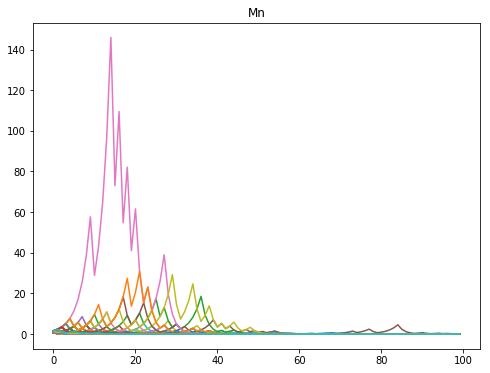

In [10]:
pl.figure(figsize=(8,6))
for i in range(100):
    pl.plot(martingal(100))
pl.title("Mn")

## Exercício 4

In [11]:
from exercicio4 import entre_chegadas, teorema448

In [12]:
lamb, T = 1, 5

In [13]:
T_ec = entre_chegadas(lamb, T)
sum(k*(T_ec[k+1]-T_ec[k]) for k in range(len(T_ec)))

IndexError: list index out of range

In [14]:
teorema448(1, 5)

[0,
 0.12861359029541553,
 0.8842225747153304,
 1.4759826967986749,
 1.5231779407915969,
 1.7483061304092384,
 5]

## Exercício 5

In [15]:
from exercicio5 import exercicio5

In [16]:
n, m = 5, 50

In [17]:
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(X)+np.random.normal(loc = 0, scale = 0.001, size = n)
Xn = np.linspace(-np.pi, np.pi, m)

In [18]:
mu, cov = exercicio5(X, Xn, Y, 0.01);

In [19]:
stdv = np.sqrt(np.diag(cov))

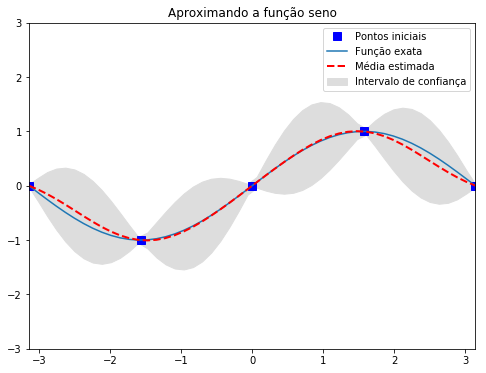

In [20]:
pl.figure(figsize=(8,6))
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, np.sin(Xn), label="Função exata")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Média estimada")
pl.axis([-np.pi, np.pi, -3, 3])
pl.title('Aproximando a função seno')
pl.legend()
pl.show()

## Exercício 6

In [21]:
from exercicio6 import exercicio6

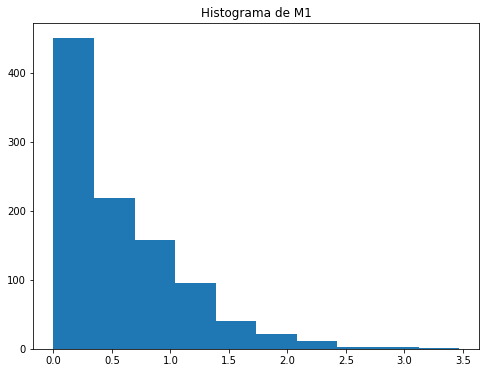

In [131]:
J = 1000
M = []
for j in range(J):
    M.append(exercicio6(5)[1])
pl.figure(figsize=(8,6))
pl.hist(M)
pl.title("Histograma de M1");

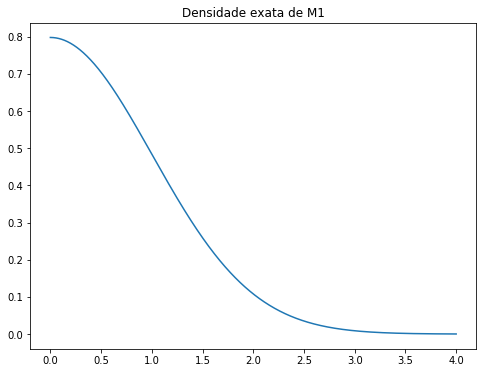

In [132]:
M = np.linspace(0, 4, 100)
f = (2/np.pi)**0.5*np.exp(-M**2/2)
pl.figure(figsize=(8,6))
pl.plot(M, f)
pl.title("Densidade exata de M1");

## Exercício 7

In [23]:
from exercicio7 import precifica_call

In [103]:
K = [80+5*i for i in range(9)]
C = []
for k in K:
    C.append(precifica_call(100, 0.05, 0.4, 1, k, 1000))

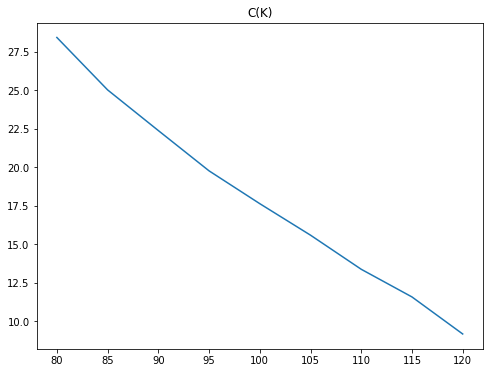

In [104]:
pl.figure(figsize=(8,6))
pl.plot(C)
pl.xticks([i for i in range(9)], K);
pl.title("C(K)");